In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

suv_data = pd.read_csv("SUV.csv")
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [2]:
print("# of SUVs in original data: " +str(len(suv_data.index)))

# of SUVs in original data: 400


## Analyzing Data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

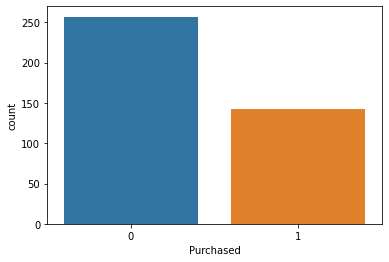

In [3]:
sns.countplot(x="Purchased", data=suv_data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

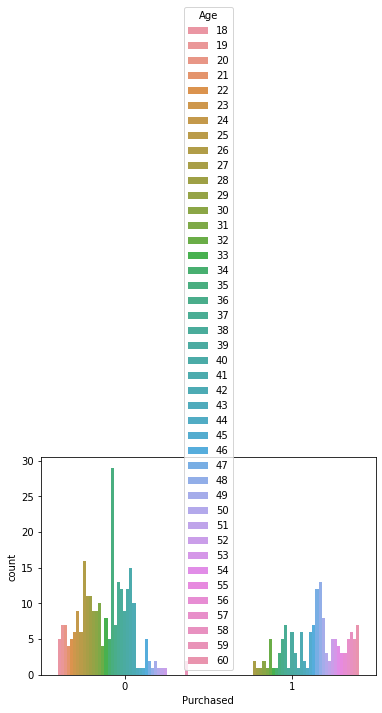

In [5]:
sns.countplot(x="Purchased", hue="Age", data=suv_data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

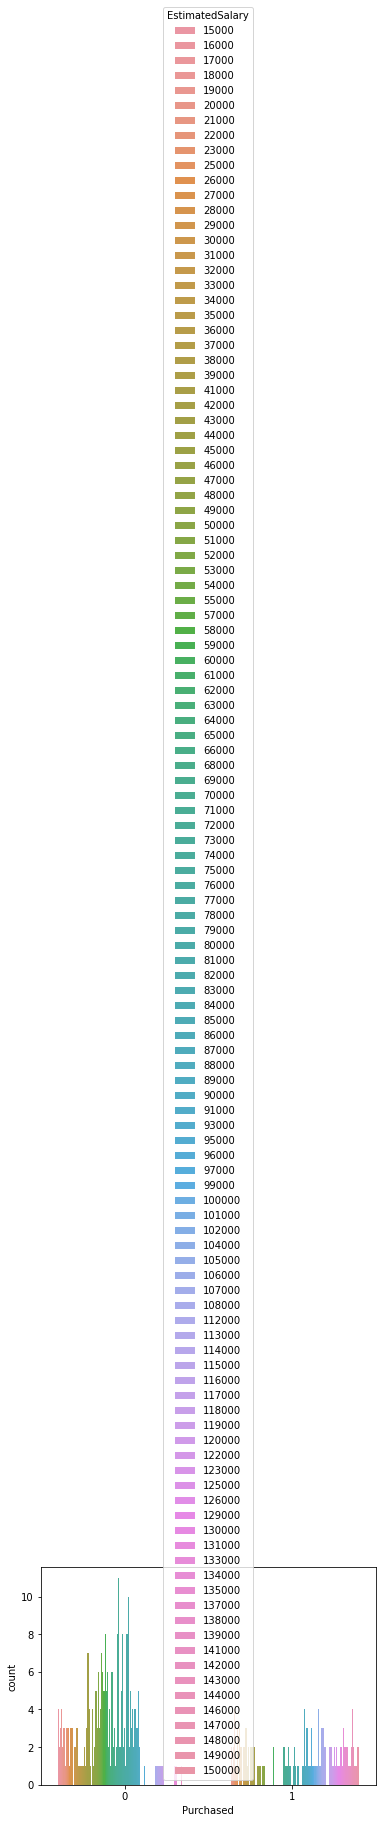

In [6]:
sns.countplot(x="Purchased", hue="EstimatedSalary", data=suv_data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

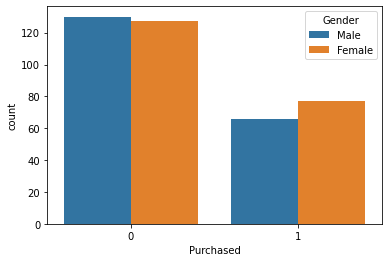

In [7]:
sns.countplot(x="Purchased", hue="Gender", data=suv_data)

<AxesSubplot:ylabel='Frequency'>

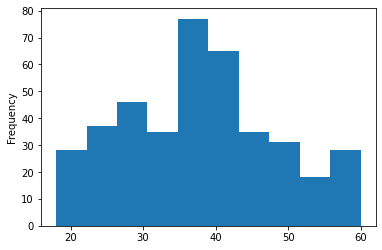

In [8]:
suv_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

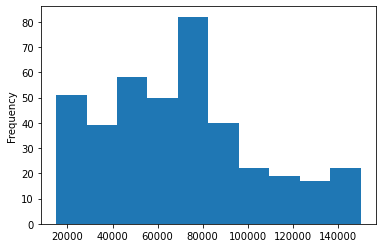

In [9]:
suv_data["EstimatedSalary"].plot.hist()

In [10]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
suv_data.drop("User ID", axis=1, inplace=True)

In [13]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


## Data Wrangling

In [14]:
suv_data.isnull()

,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
395,False,False,False,False
396,False,False,False,False
397,False,False,False,False
398,False,False,False,False


In [16]:
suv_data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

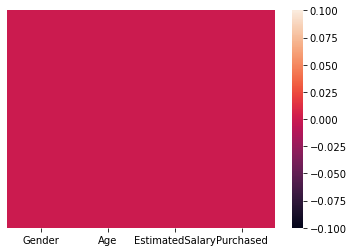

In [17]:
sns.heatmap(suv_data.isnull(), yticklabels = False)

<AxesSubplot:>

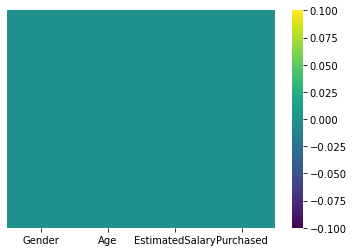

In [18]:
sns.heatmap(suv_data.isnull(), yticklabels = False, cmap = "viridis")

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

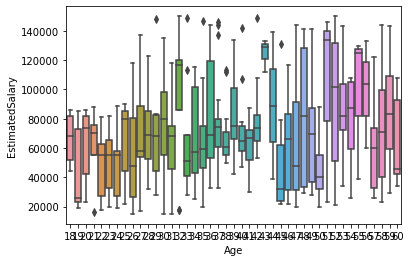

In [20]:
sns.boxplot(x="Age", y="EstimatedSalary", data=suv_data)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

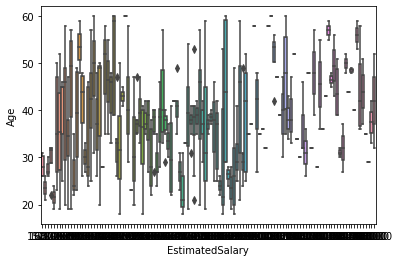

In [21]:
sns.boxplot(x="EstimatedSalary", y="Age", data=suv_data)

In [22]:
pd.get_dummies(suv_data["Gender"])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [23]:
sex = pd.get_dummies(suv_data["Gender"], drop_first=True)
sex.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [24]:
suv_data = pd.concat([suv_data, sex], axis = 1)

In [25]:
suv_data.head(5)

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [26]:
suv_data.drop(["Gender"], axis = 1, inplace = True)

In [27]:
suv_data.head(5)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


## Train Data

In [50]:
x = suv_data.iloc[:,[0,1]].values
y = suv_data.iloc[:,2].values

## Independent Variable X is Age and Salary

In [51]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


## dependent Variable Y is Purchased

In [53]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [54]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [72]:
from sklearn.preprocessing import StandardScaler

In [74]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [78]:
y_pred = classifier.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_test, y_pred)

0.89